# Function defs

Esta tabla contiene la información de las definiciones de funciones.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('functiondefs')

# Table name, features and target.
TABLE_NAME = 'functiondefs'
TABLE_FEATURES = ['functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct', 'functiondef__expertise_level']
TABLE_TARGET = 'functiondef__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2024-05-29 11:32:35.294048 Loading data ...
2024-05-29 11:32:36.325969 Data successfully load!!
2024-05-29 11:32:36.325969 Creating data cache files ...
2024-05-29 11:32:36.363636 Data cache files successfully created!!
Features shape: (55548, 13)
Target shape: (55548,)
As we can see the downloaded data contains a total of 55548 instances. For each instance we have 13 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55548 entries, 0 to 55547
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   functiondef__name_convention             55548 non-null  object 
 1   functiondef__number_of_characters        55548 non-null  int64  
 2   functiondef__is_magic                    55548 non-null  bool   
 3   functiondef__is_private                  55548 non-null  bool   
 4   functiondef__body_count                  55548 non-null  int64  
 5   functiondef__expressions_pct             55548 non-null  float64
 6   functiondef__is_async                    55548 non-null  bool   
 7   functiondef__number_of_decorators        55548 non-null  int64  
 8   functiondef__has_return_type_annotation  55548 non-null  bool   
 9   functiondef__has_doc_string              55548 non-null  bool   
 10  functiondef__height                      55548

Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 5 variables boleanas y dos de tipo objeto. 

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 43.59% instances for BEGINNER class and 56.41% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [68.83%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
functiondef__expertise_level               0
dtype: int64

In [6]:
print_empty_cols(X)

functiondef__name_convention
----------------------------
0 instancias no tienen un valor para la columna functiondef__name_convention


functiondef__number_of_characters
---------------------------------
0 instancias no tienen un valor para la columna functiondef__number_of_characters


functiondef__is_magic
---------------------
0 instancias no tienen un valor para la columna functiondef__is_magic


functiondef__is_private
-----------------------
0 instancias no tienen un valor para la columna functiondef__is_private


functiondef__body_count
-----------------------
0 instancias no tienen un valor para la columna functiondef__body_count


functiondef__expressions_pct
----------------------------
0 instancias no tienen un valor para la columna functiondef__expressions_pct


functiondef__is_async
---------------------
0 instancias no tienen un valor para la columna functiondef__is_async


functiondef__number_of_decorators
---------------------------------
0 instancias no tienen un valo

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
functiondef__name_convention,55548,7,SnakeCase,40378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,55548.0,NaN,NaN,NaN,15.78136,9.013097,1.0,10.0,14.0,20.0,87.0
functiondef__is_magic,55548,2,False,55469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__is_private,55548,2,False,47673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__body_count,55548.0,NaN,NaN,NaN,4.659034,4.910758,1.0,2.0,3.0,6.0,172.0
functiondef__expressions_pct,55548.0,NaN,NaN,NaN,0.218749,0.25987,0.0,0.0,0.166667,0.333333,1.0
functiondef__is_async,55548,2,False,54587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_decorators,55548.0,NaN,NaN,NaN,0.185731,0.583818,0.0,0.0,0.0,0.0,46.0
functiondef__has_return_type_annotation,55548,2,False,42991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__has_doc_string,55548,2,False,34126,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 46
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 12), (12, 18), (18, inf)], # min: 1 ; max: 87
    "functiondef__body_count": [(1.0, 1.0), (1.0, 3.0), (3.0, 5.0), (5.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(1.0, 1.0), (1.0, 1.9), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 10
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(X_copy, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
functiondef__expressions_pct  count  percentage
                   [0.0_0.0]  23768   42.788219
                   [0.0_0.5)  20709   37.281270
                   [0.5_1.0)   8849   15.930367
                   [1.0_inf]   2222    4.000144

functiondef__number_of_decorators  count  percentage
                        [0.0_0.0]  47070   84.737524
                        [0.0_inf]   8478   15.262476

functiondef__type_annotations_pct  count  percentage
                        [0.0_0.0]  40690   73.251962
                        [1.0_inf]  12216   21.991791
                        [0.0_1.0)   2642    4.756247

functiondef__number_of_characters  count  percentage
                         [18_inf]  19533   35.164182
                          [12_18)  16455   29.623029
                         [8.0_12)  10598   19.078995
                        [1.0_8.0)   8962   16.133794

functiondef__body_count  count  percentage
              [5.0_inf]  19282   34.712321
           

### IMPORTANTE
Hay que corregir el doc_string. 

In [9]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (55548, 20)
Target shape: (55548,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

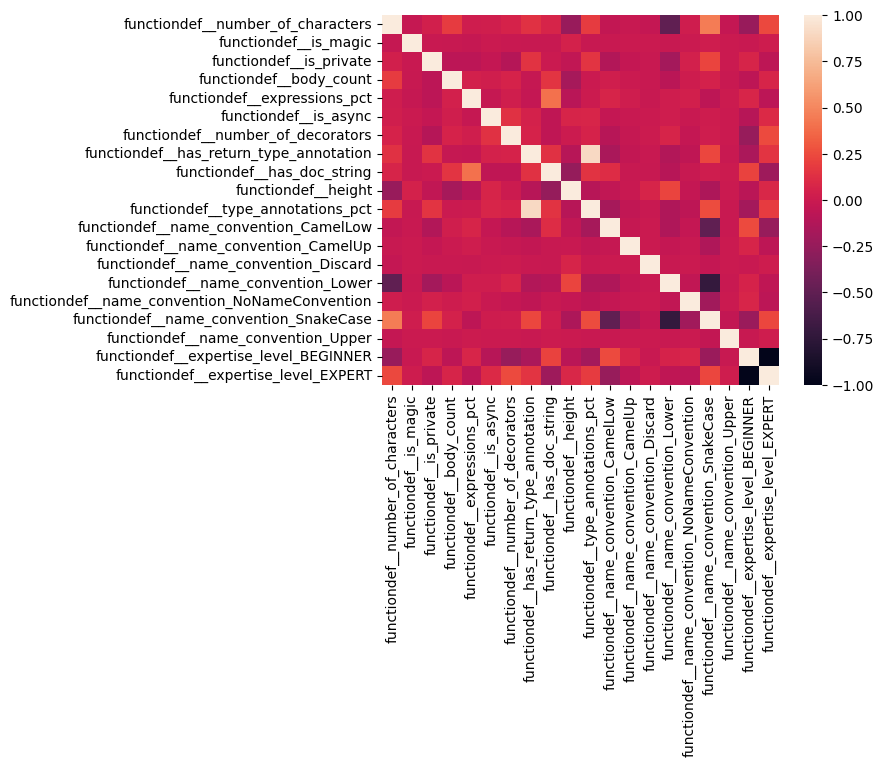

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 12 variables (2 porcentuales, 4 numericas, 5 booleanas y 1 categorica)

### Variable is_private (1/12)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

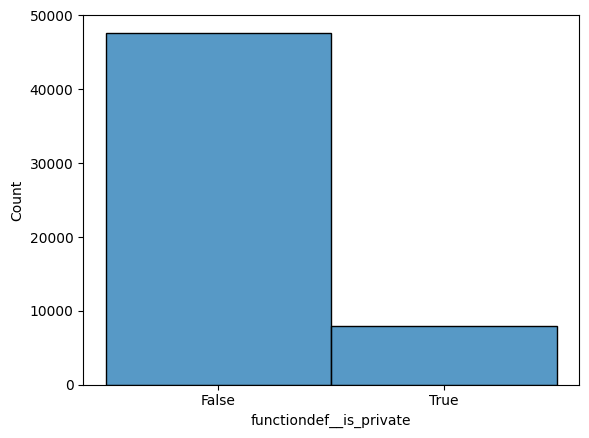

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [12]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 7875 valores verdaderos y 47673 valores falsos. Y, la desviación típica es de 0.34881648421287537
La frecuencia con la que programa puede tener la variable is_private a True es 0.14176928062216462.
La frecuencia con la que programa puede tener la variable is_private a False es 0.8582307193778353.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 85.82% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 14.18% de los items.


In [14]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,7875.000000,7875.0,7875.0,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000,7875.0,7875.0,7875.0,7875.0,7875.000000,7875.000000,7875.000000,7875.000000,7875.000000
mean,16.539557,0.0,1.0,3.798349,0.169699,0.007238,0.034794,0.374349,0.380952,1.192508,0.398063,0.0,0.0,0.0,0.0,0.027302,0.972063,0.000635,0.516698,0.483302
std,7.364356,0.0,0.0,4.093053,0.231817,0.084774,0.191404,0.483985,0.485652,0.605428,0.481453,0.0,0.0,0.0,0.0,0.162971,0.164801,0.025191,0.499753,0.499753
min,2.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.0,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000
50%,15.000000,0.0,1.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000
75%,21.000000,0.0,1.0,5.000000,0.333333,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,1.000000
max,53.000000,0.0,1.0,172.000000,1.000000,1.000000,3.000000,1.000000,1.000000,7.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable is_magic (2/12)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

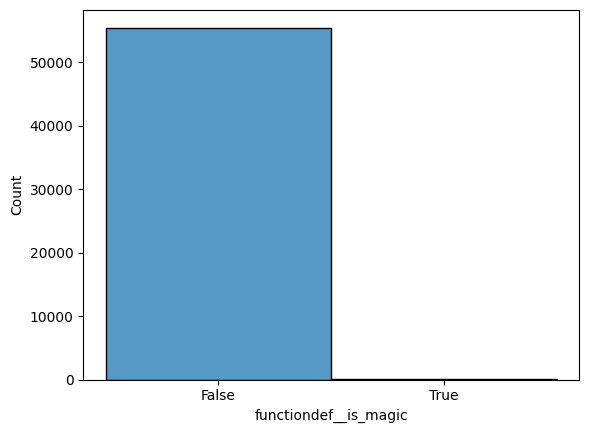

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 79 valores verdaderos y 55469 valores falsos. Y, la desviación típica es de 0.037685491144657135
La frecuencia con la que programa puede tener la variable is_magic a True es 0.0014221934183048894.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.9985778065816951.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 99.86% de los items.
La variable functiondef__is_magic toma el valor de 1.0 en un 0.1422% de los items.


In [18]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,79.000000,79.0,79.0,79.000000,79.000000,79.0,79.0,79.0,79.000000,79.000000,79.000000,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.000000,79.000000
mean,9.873418,1.0,0.0,2.582278,0.032188,0.0,0.0,0.0,0.126582,2.253165,0.067511,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.303797,0.696203
std,1.903890,0.0,0.0,1.721713,0.083692,0.0,0.0,0.0,0.334629,0.940108,0.222520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462835,0.462835
min,7.000000,1.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
25%,8.000000,1.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
50%,11.000000,1.0,0.0,3.000000,0.000000,0.0,0.0,0.0,0.000000,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000
75%,12.000000,1.0,0.0,4.000000,0.000000,0.0,0.0,0.0,0.000000,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000
max,12.000000,1.0,0.0,8.000000,0.333333,0.0,0.0,0.0,1.000000,3.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000



### Variable is_async (3/12)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

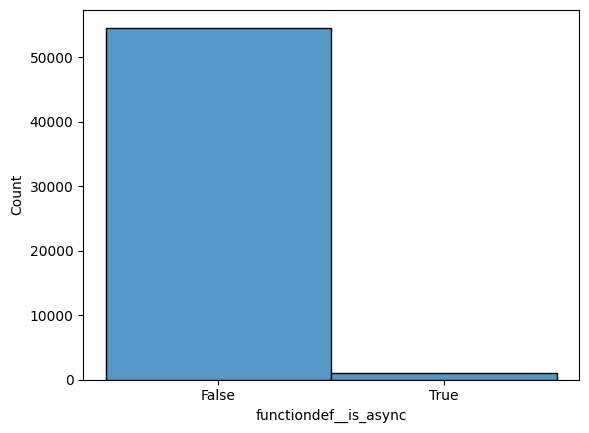

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 961 valores verdaderos y 54587 valores falsos. Y, la desviación típica es de 0.1303892433643341
La frecuencia con la que programa puede tener la variable is_async a True es 0.017300352847987328.
La frecuencia con la que programa puede tener la variable is_async a False es 0.9826996471520126.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 98.27% de los items.
La variable functiondef__is_async toma el valor de 1.0 en un 1.73% de los items.


In [22]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,961.000000,961.0,961.000000,961.000000,961.000000,961.0,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.0,961.0,961.000000,961.000000,961.000000,961.0,961.000000,961.000000
mean,17.618107,0.0,0.059313,5.613944,0.169043,1.0,0.788762,0.388137,0.182102,1.626431,0.469946,0.009365,0.0,0.0,0.220604,0.001041,0.768991,0.0,0.062435,0.937565
std,11.352351,0.0,0.236333,6.140183,0.241351,0.0,0.917491,0.487580,0.386129,0.946974,0.471929,0.096370,0.0,0.0,0.414870,0.032258,0.421698,0.0,0.242070,0.242070
min,1.000000,0.0,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,9.000000,0.0,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
50%,16.000000,0.0,0.000000,4.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,24.000000,0.0,0.000000,7.000000,0.266667,1.0,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,69.000000,0.0,1.000000,59.000000,1.000000,1.0,5.000000,1.000000,1.000000,6.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable has_return_type_annotation (4/12)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

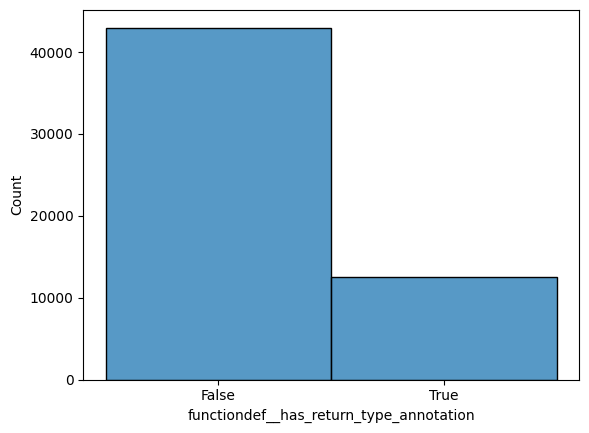

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 12557 valores verdaderos y 42991 valores falsos. Y, la desviación típica es de 0.41828009486198425
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.22605674371714554.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 0.7739432562828544.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 77.39% de los items.
La variable functiondef__has_return_type_annotation toma el valor de 1.0 en un 22.61% de los items.


In [26]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,12557.000000,12557.0,12557.000000,12557.000000,12557.000000,12557.000000,12557.000000,12557.0,12557.000000,12557.000000,12557.000000,12557.000000,12557.0,12557.0,12557.000000,12557.000000,12557.000000,12557.0,12557.000000,12557.000000
mean,18.099148,0.0,0.234769,4.389822,0.202892,0.029705,0.247193,1.0,0.510154,1.151071,0.937211,0.002071,0.0,0.0,0.079239,0.000956,0.917735,0.0,0.297762,0.702238
std,8.411617,0.0,0.423872,4.234098,0.228323,0.169778,0.546697,0.0,0.499917,0.517796,0.184460,0.045458,0.0,0.0,0.270122,0.030900,0.274779,0.0,0.457293,0.457293
min,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.142857,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,12.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
50%,17.000000,0.0,0.000000,3.000000,0.166667,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,22.000000,0.0,0.000000,5.000000,0.333333,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,1.000000,1.000000
max,87.000000,0.0,1.000000,83.000000,1.000000,1.000000,20.000000,1.0,1.000000,6.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable has_doc_string (5/12)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

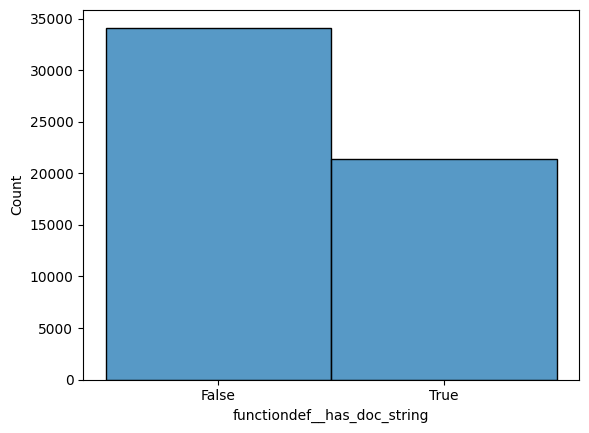

In [27]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [28]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 21422 valores verdaderos y 34126 valores falsos. Y, la desviación típica es de 0.4867524802684784
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.3856484481889537.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.6143515518110463.


In [29]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 0.0 en un 61.44% de los items.
La variable functiondef__has_doc_string toma el valor de 1.0 en un 38.56% de los items.


In [30]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,21422.000000,21422.000000,21422.000000,21422.000000,21422.000000,21422.000000,21422.000000,21422.000000,21422.0,21422.000000,21422.000000,21422.000000,21422.000000,21422.0,21422.000000,21422.000000,21422.000000,21422.000000,21422.000000,21422.000000
mean,16.499861,0.000467,0.140043,5.584446,0.350106,0.008169,0.142004,0.299038,1.0,1.053683,0.318375,0.127486,0.005602,0.0,0.117543,0.011017,0.737653,0.000700,0.572356,0.427644
std,8.345654,0.021601,0.347040,4.988062,0.193934,0.090016,0.634579,0.457847,0.0,0.310580,0.453306,0.333524,0.074636,0.0,0.322073,0.104383,0.439921,0.026453,0.494749,0.494749
min,1.000000,0.000000,0.000000,1.000000,0.011628,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,3.000000,0.200000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,0.000000,0.000000,4.000000,0.333333,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,21.000000,0.000000,0.000000,7.000000,0.500000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,70.000000,1.000000,1.000000,172.000000,1.000000,1.000000,46.000000,1.000000,1.0,5.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (6/12)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 87. Con una media de 15.80.

<Axes: ylabel='functiondef__number_of_characters'>

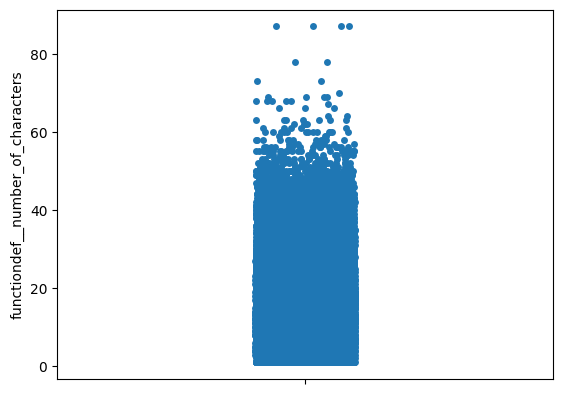

In [31]:
sns.stripplot(X['functiondef__number_of_characters'])

In [32]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6900337426237357
Rango valores atípicos extremos (Tukey): [-20.0,50.0]
Rango valores atípicos leves (Tukey): [-5.0,35.0]
Rango valores atípicos extremos (Fixed BoxPlot): [8.659648219971547,257.0296340720414]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -20.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -5.0 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 1993 instancias tienen un valor para functiondef__number_of_characters superior a 35.0 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 3.588% del total de instancias.
+3.0IQR: 207 instancias tienen un valor para functiondef__number_of_characters superior a 50.0 (Q3-3*IQR) para functiondef__number_of_characters. Rep

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 50.0 (Con un MC de 68 usamos Tuckey Extremo)

In [33]:
X[X['functiondef__number_of_characters'] > 50].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.0,207.000000,207.0,207.0,207.0,207.0,207.000000,207.000000,207.0,207.0,207.0
mean,57.120773,0.0,0.009662,8.086957,0.223742,0.048309,0.516908,0.217391,0.236715,1.0,0.294686,0.0,0.0,0.0,0.0,0.004831,0.995169,0.0,0.0,1.0
std,6.796623,0.0,0.098056,6.397222,0.263839,0.214939,0.805596,0.413471,0.426096,0.0,0.450992,0.0,0.0,0.0,0.0,0.069505,0.069505,0.0,0.0,0.0
min,51.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0
25%,52.000000,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0
50%,55.000000,0.0,0.000000,7.000000,0.166667,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0
75%,60.000000,0.0,0.000000,10.000000,0.333333,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0
max,87.000000,0.0,1.000000,41.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.0,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.0


### IMPORTANTE
La mayoria de las funciones con nombres muy largos (>50) son de expertos y en SnakeCase.

### Variable body_count (7/12)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 172. Con una media de 4.66.

<Axes: ylabel='functiondef__body_count'>

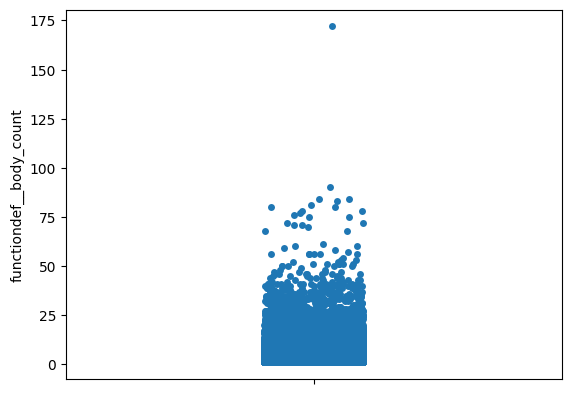

In [34]:
sns.stripplot(X['functiondef__body_count'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [35]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.884006827931578
Rango valores atípicos extremos (Tukey): [-10.0,18.0]
Rango valores atípicos leves (Tukey): [-4.0,12.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.7280846375392465,211.98158692891047]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -10.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -4.0 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 3009 instancias tienen un valor para functiondef__body_count superior a 12.0 (Q3+1.5*IQR) para functiondef__body_count. Representando un 5.417% del total de instancias.
+3.0IQR: 1161 instancias tienen un valor para functiondef__body_count superior a 18.0 (Q3-3*IQR) para functiondef__body_count. Representando un 2.09% del total de instancias.
L: 10344 instancias tienen un val

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 18.0 (Con un MC de 88 usamos Tuckey Extremo)

In [36]:
X[X['functiondef__body_count'] > 18].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,1161.000000,1161.0,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.0,1161.000000,1161.000000,1161.000000,1161.0,1161.000000,1161.000000
mean,20.342808,0.0,0.043928,27.294573,0.259958,0.037898,0.385874,0.141258,0.436693,1.033592,0.179642,0.080103,0.001723,0.0,0.128338,0.012059,0.777778,0.0,0.221361,0.778639
std,11.318339,0.0,0.205022,11.145173,0.230932,0.191033,0.891110,0.348437,0.496190,0.255441,0.374413,0.271570,0.041487,0.0,0.334610,0.109194,0.415919,0.0,0.415342,0.415342
min,3.000000,0.0,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,11.000000,0.0,0.000000,20.000000,0.052632,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
50%,19.000000,0.0,0.000000,24.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,27.000000,0.0,0.000000,30.000000,0.421053,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,66.000000,0.0,1.000000,172.000000,1.000000,1.000000,11.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable number_of_decorators (8/12)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 46. Con una media de 0.18.

<Axes: ylabel='functiondef__number_of_decorators'>

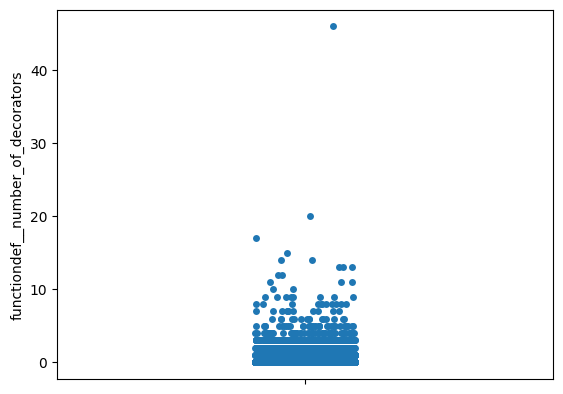

In [37]:
sns.stripplot(X['functiondef__number_of_decorators'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [38]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8389150261499574
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 8478 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 15.26% del total de instancias.
+3.0IQR: 8478 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 15.26% del total de ins

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [39]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,8478.000000,8478.0,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000,8478.000000
mean,17.052017,0.0,0.031257,4.820830,0.230734,0.061571,1.216914,0.322954,0.271290,1.334395,0.292035,0.004128,0.000236,0.000944,0.236494,0.001297,0.756075,0.000826,0.059094,0.940906
std,11.403793,0.0,0.174023,5.774424,0.279655,0.240389,0.989153,0.467633,0.444652,0.687696,0.413996,0.064123,0.015358,0.030706,0.424954,0.035999,0.429474,0.028724,0.235815,0.235815
min,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,15.000000,0.0,0.000000,3.000000,0.142857,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,24.000000,0.0,0.000000,6.000000,0.363636,0.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,70.000000,0.0,1.000000,84.000000,1.000000,1.000000,46.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable height (9/12)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 10. Con una media de 1.26.

<Axes: ylabel='functiondef__height'>

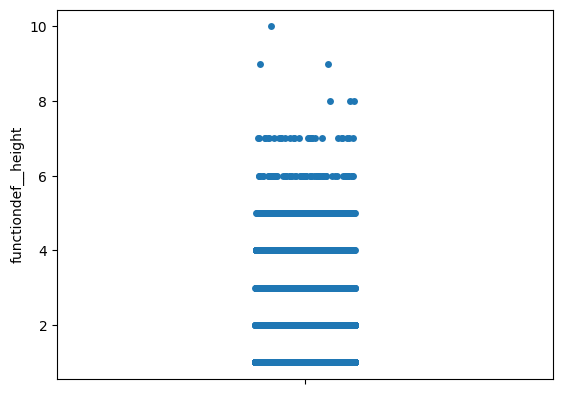

In [40]:
sns.stripplot(X['functiondef__height'])

In [41]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a 1.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a 1.0 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 9563 instancias tienen un valor para functiondef__height superior a 1.0 (Q3+1.5*IQR) para functiondef__height. Representando un 17.22% del total de instancias.
+3.0IQR: 9563 instancias tienen un valor para functiondef__height superior a 1.0 (Q3-3*IQR) para functiondef__height. Representando un 17.22% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 1.0 para functiondef__height. Representando un 0.0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1.0 (Todos los umbrales son 1)

In [42]:
X[X['functiondef__height'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000,9563.000000
mean,10.509150,0.005438,0.097250,2.540312,0.151720,0.037122,0.212276,0.124961,0.075918,2.601276,0.138764,0.047893,0.005960,0.002510,0.376555,0.003555,0.562794,0.000732,0.317160,0.682840
std,6.868593,0.073543,0.296313,2.472505,0.288468,0.189071,0.415033,0.330692,0.264880,0.842593,0.337530,0.213551,0.076978,0.050036,0.484547,0.059524,0.496067,0.027047,0.465395,0.465395
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,15.000000,0.000000,0.000000,3.000000,0.200000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,50.000000,1.000000,1.000000,51.000000,1.000000,1.000000,3.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 83% tienen altura 1, apenas el 7% tienen altura mayor que 2 

### Variable expressions_pct (10/12)
Esta variable representa la proporción de las sentencias en el root de la funcion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.21.

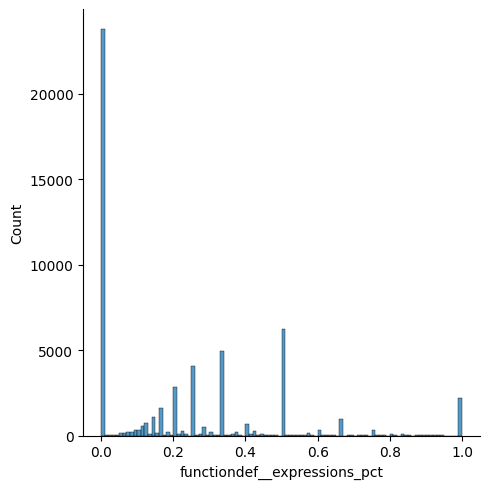

In [43]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [44]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5213813781738281
Rango valores atípicos extremos (Tukey): [-1.0000000298023224,1.3333333730697632]
Rango valores atípicos leves (Tukey): [-0.5000000149011612,0.833333358168602]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.08062214024167073,4.357743527032294]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.0000000298023224 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.5000000149011612 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 2379 instancias tienen un valor para functiondef__expressions_pct superior a 0.833333358168602 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 4.283% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct superi

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.83 (Con un MC de 0.5 usamos Tuckey)

In [45]:
X[X['functiondef__expressions_pct'] > 0.84].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,2377.000000,2377.0,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.00000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000,2377.000000
mean,14.428271,0.0,0.092974,2.806058,0.992795,0.015987,0.253260,0.132520,0.27724,1.493479,0.212023,0.078250,0.018511,0.000421,0.238536,0.034077,0.629785,0.000421,0.379049,0.620951
std,9.964541,0.0,0.290458,3.982051,0.028374,0.125450,0.717018,0.339127,0.44773,0.933872,0.405193,0.268621,0.134817,0.020511,0.426278,0.181464,0.482964,0.020511,0.485252,0.485252
min,1.000000,0.0,0.000000,1.000000,0.842105,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,18.000000,0.0,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,68.000000,0.0,1.000000,77.000000,1.000000,1.000000,12.000000,1.000000,1.00000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 42% tienen un 0% y casi 4% un 100% de expresiones.

### Variable type_annotations_pct (11/12)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 1.0. Su media es 0.24.

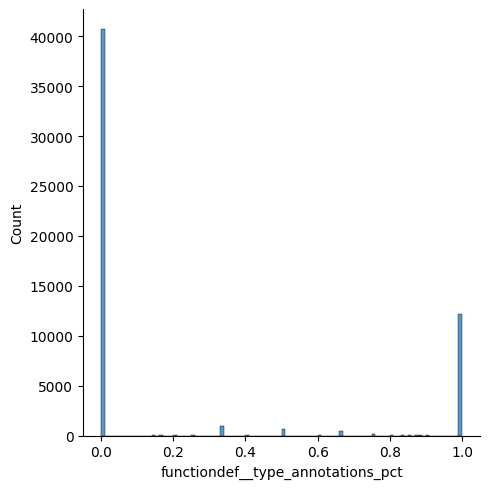

In [46]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [47]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.42337363958358765
Rango valores atípicos extremos (Tukey): [-1.0000000298023224,1.3333333730697632]
Rango valores atípicos leves (Tukey): [-0.5000000149011612,0.833333358168602]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.11361327872967772,3.052559687485839]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -1.0000000298023224 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -0.5000000149011612 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 12306 instancias tienen un valor para functiondef__type_annotations_pct superior a 0.833333358168602 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 22.15% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para fun

In [48]:
X[X['functiondef__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.0,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000,14858.000000
mean,18.438349,0.000471,0.218939,4.576592,0.217152,0.033921,0.275138,0.845134,0.497308,1.154126,0.909573,0.002356,0.000067,0.0,0.079553,0.001077,0.916880,0.000067,0.253062,0.746938
std,8.786107,0.021701,0.413541,4.407579,0.245952,0.181032,0.727966,0.361789,0.500010,0.527564,0.208571,0.048479,0.008204,0.0,0.270609,0.032799,0.276073,0.008204,0.434781,0.434781
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.052632,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,0.000000,3.000000,0.166667,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,23.000000,0.000000,0.000000,6.000000,0.333333,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,83.000000,1.000000,1.000000,20.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 73% tienen un 0% y menos del 5% un 100% de anotaciones de tipo.

### Variable name_convention (12/12)
Esta variable es de tipo categórica y representa la name_convention del nombre de la funcion.

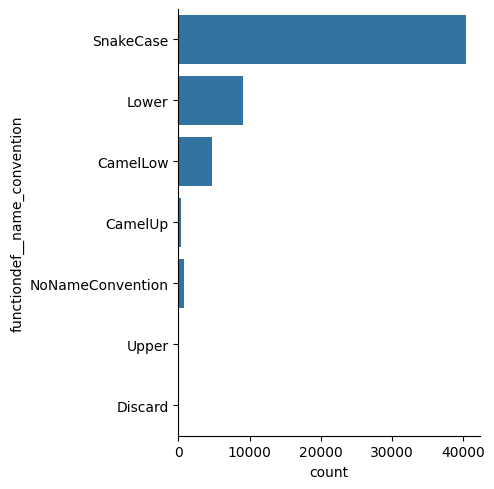

In [49]:
sns.catplot(full_table['functiondef__name_convention'], kind="count")

In [50]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable functiondef__name_convention toma el valor de SnakeCase en un 72.69% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 16.42% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 8.621% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 1.413% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 0.7291% de los items.
La variable functiondef__name_convention toma el valor de Upper en un 0.06841% de los items.
La variable functiondef__name_convention toma el valor de Discard en un 0.05401% de los items.


In [51]:
print_values_usage_for_cat_var(full_table, 'functiondef__name_convention', NAMING_CONVENTION_VALUES)

La variable functiondef__name_convention puede tomar 7 valores distintos
	7 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

TODO: isolation forest algorithm

In [52]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,functiondef_id,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__expertise_level
2535,520012,CamelUp,4,False,False,26,1.000000,False,0,False,True,1,0.0,BEGINNER
2565,522482,CamelUp,4,False,False,26,1.000000,False,0,False,True,1,0.0,BEGINNER
7378,1013372,CamelLow,9,False,False,26,0.653846,False,0,False,True,3,0.0,BEGINNER
11385,1882913,Lower,6,False,False,1,1.000000,False,1,True,False,1,1.0,BEGINNER
13902,2399175,Lower,6,False,False,1,1.000000,False,1,True,False,1,1.0,BEGINNER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53175,7288147,Lower,4,False,False,3,1.000000,False,3,True,True,1,1.0,EXPERT
53238,7283067,Lower,4,False,False,7,0.428571,False,10,True,True,1,1.0,EXPERT
53263,7278289,Lower,4,False,False,10,0.400000,False,20,True,False,1,1.0,EXPERT
53297,7273895,Lower,4,False,False,15,0.200000,False,7,False,False,1,1.0,EXPERT


### IMPORTANTE
Hay que analizar los 55 los outliers de la tabla.